# Quantum plots

This notebook provides plotting functionality tailored for the use with the `quantumarticle` documentclass.

## Global routines

The parameters for the plots are set in a way that the font sizes in the resulting graphic match those in the surrounding document.

In [62]:
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}
_width         = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
    
    # Seaborn white is a good base style
    plt.style.use('seaborn-white')
    mpl.use("pgf")
    mpl.interactive(False)
    
    # Set up pgf and LaTeX
    plt.rcParams['pgf.texsystem'] = 'pdflatex'
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['text.usetex'] = False
    plt.rcParams['pgf.rcfonts'] = True 
    plt.rcParams['pgf.preamble'] = r'''\usepackage{lmodern}  
             \usepackage[utf8x]{inputenc}
             \usepackage[T1]{fontenc}'''
    
    # Style the plot
    plt.rcParams['xtick.direction'] = 'in'
    plt.rcParams['ytick.direction'] = 'in'
    plt.rcParams['xtick.major.size'] = 4
    plt.rcParams['ytick.major.size'] = 4    
    plt.rcParams['lines.linewidth'] = 1
    plt.rcParams['axes.linewidth'] = .5
    plt.rcParams['grid.linewidth'] = .5
    plt.rcParams['lines.markersize'] = 3
    
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.framealpha'] = 1.0
    plt.rcParams['legend.fancybox'] = False
    
    plt.rcParams['axes.edgecolor'] = _quantumgray
    
    # make quantumviolet the first color in the color cycle
    mpl.rcParams['axes.prop_cycle'] = cycler(color=['#53257F', '#ff7f0e', '#2ca02c', '#1f77b4', '#d62728', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    
    global _width 
    _width = _widths[columns][paper]
    
    # the caption fontsize is 'small' which corresponds to 
    # one point less than the chosen font size
    # 'footnotesize' is two point smaller than the chosen font size
    scriptsize = fontsize - 4 if fontsize == 12 else fontsize - 3
    tiny = scriptsize - 2
    footnotesize = fontsize - 2
    small = fontsize - 1
    large = fontsize + 1 if fontsize == 11 else fontsize + 2
    Large = large + 3 if fontsize == 12 else large + 2
    LARGE = Large + 3 
    plt.rcParams['axes.labelsize'] = small
    plt.rcParams['axes.titlesize'] = large
    plt.rcParams['xtick.labelsize'] = footnotesize
    plt.rcParams['ytick.labelsize'] = footnotesize
    plt.rcParams['font.size'] = small
    
    return {
        'fontsizes' : {
            'tiny' : tiny,
            'scriptsize' : scriptsize,
            'footnotesize' : footnotesize, 
            'small' : small, 
            'normalsize' : fontsize,
            'large' : large, 
            'Large' : Large, 
            'LARGE' : LARGE
        },
        'colors' : {
            'quantumviolet' : _quantumviolet,
            'quantumgray' : _quantumgray
        }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         \includegraphics[width={width_ratio}\columnwidth]{...}

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0):
    width = _width * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    

## Examples

When setting up your plots you have to call `global_setup` once and set the global options of your `quantumarticle`

In [63]:
%matplotlib inline

# Has to be called after matplotlib inline
props = global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10)

print('Global props:')
for key in props:
    print(key, ':')
    for subkey in props[key]:
        print('    ', subkey, ': ', props[key][subkey])

Global props:
fontsizes :
     tiny :  5
     scriptsize :  7
     footnotesize :  8
     small :  9
     normalsize :  10
     large :  12
     Large :  14
     LARGE :  17
colors :
     quantumviolet :  #53257F
     quantumgray :  #555555


We recommend that you use `tight_layout()` on your plots. Plots should _always_ be saved as __pdf__ files. This will result in the highest quality graphics that can seamlessly integrated in your publications.

**Attention:** sometimes, the notebook does not display the generated figures. In this case, add `%matplotlib inline` to a cell that does create a plot, run the cell, remove the `%matplotlib inline` and rerun `global_setup`

### Lineplot

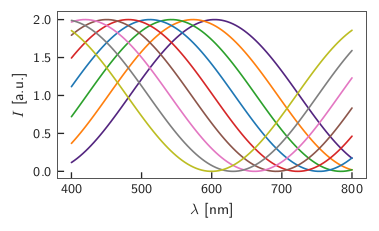

In [64]:
x = np.linspace(400, 800, 100)

fig = plot_setup()

for i in range(9):
    y = 1+np.sin(.013*x+.4*i)
    plt.plot(x, y)
    
plt.xlabel('$\\lambda$ [nm]')
plt.ylabel('$I$ [a.u.]')
plt.tight_layout()

### Data plot

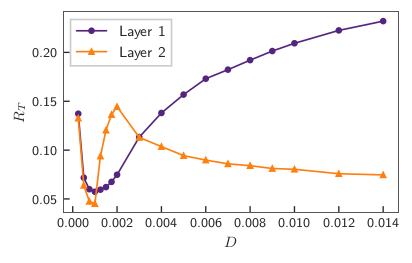

In [65]:
Ds = np.concatenate([np.arange(0.00025,0.0021,0.00025) , np.arange(0.003,0.011, 0.001) , [0.012,0.014]])

RT1 = [0.137244, 0.0717596, 0.0599749, 0.0574315, 0.0594974, 0.0621222, 0.0674902, 0.0747963, 0.113289, 0.138015, 0.156837, 0.173086, 0.182361, 0.19209, 0.201404, 0.20936, 0.222541, 0.232029] 
RT1_std = [0.00630981, 0.0042112, 0.00442357, 0.00430778, 0.00682198, 0.00924101, 0.0120358, 0.0153502, 0.017939, 0.0175116, 0.0177625, 0.0170304, 0.0172532, 0.0178392, 0.0173897, 0.0186951, 0.0197251, 0.019896]
RT2 = [0.132671, 0.0638861, 0.0475232, 0.0451378, 0.093839, 0.120379, 0.136352, 0.144436, 0.112958, 0.103575, 0.0943459, 0.0897908, 0.0859248, 0.0840781, 0.0811686, 0.0803692, 0.0758179, 0.0746361]
RT2_std = [0.00627376, 0.00379742, 0.0040468, 0.00790347, 0.016209, 0.00974721, 0.0136891, 0.0126009, 0.0108238, 0.00789612, 0.00453309, 0.00640408, 0.00607691, 0.00590591, 0.00551176, 0.00594776, 0.00389493, 0.00461693]

fig = plot_setup()
R1, = plt.plot(Ds, RT1, marker = 'o')
R2, = plt.plot(Ds, RT2, marker = '^')

plt.xlabel('$D$')
plt.ylabel('$R_T$')

plt.legend([R1, R2], ['Layer 1', 'Layer 2'])
plt.tight_layout(pad = 0.0)

### TeX decorations

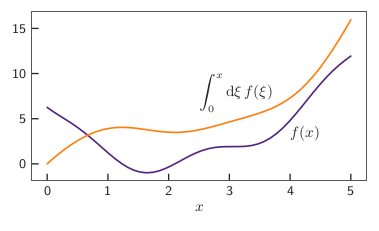

In [66]:
x = np.linspace(0, 5, 50)
f = (x-1)**2 - x + 0.25 + np.sin(3*x) + 5 * np.exp(-x)
F = (x-1)**3/3. - x**2/2 + 0.25*x + 1/3. - 1/3. * (np.cos(3*x)-1) - 5 * np.exp(-x) + 5

fig = plot_setup()

plt.plot(x, f)
plt.plot(x, F)

plt.text(4,3,'$f(x)$')
plt.text(2.5,7.5, r'$\int_0^x \mathrm{d}\xi \, f(\xi)$')
plt.xlabel('$x$')
plt.tight_layout()

## Spectrum

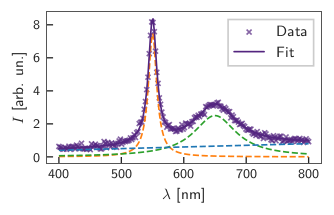

In [67]:
# Generate dummy spectral data
x = np.linspace(400, 800, 200)
y = 30 / (4 + ((x-550)/4)**2) + 30 / (12 + ((x-650)/12)**2) + .001*x + np.random.normal(0,.1, 200)

fig = plot_setup(width_ratio = .8)

# plot data
data = plt.scatter(x,y, color = 'C0', alpha = 0.7, marker = 'x')

# plot fits
y_fit1 = 30 / (4 + ((x-550)/4)**2)
plt.plot(x, y_fit1, color = 'C1', ls = '--')

y_fit2 = 30 / (12 + ((x-650)/12)**2)
plt.plot(x, y_fit2, color = 'C2', ls = '--')

y_fit3 = .001*x
plt.plot(x, y_fit3, color = 'C3', ls = '--')

y_fit = y_fit1 + y_fit2 + y_fit3
fit, = plt.plot(x, y_fit, color = 'C0')

plt.xlabel('$\\lambda$ [nm]')
plt.ylabel('$I$ [arb. un.]')
plt.legend([data, fit], ['Data', 'Fit'])
plt.tight_layout(pad = 0.0)

#plt.savefig('spectrum_onecolumn_08.pdf')

### Scatter plot

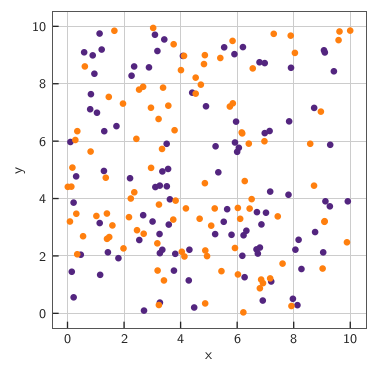

In [22]:
fig = plot_setup(aspect_ratio = 1.0)

for i in range(2):
    x = np.random.uniform(0,10,100)
    y = np.random.uniform(0,10,100)
    plt.scatter(x, y)
    
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.tight_layout()

### Contour plot

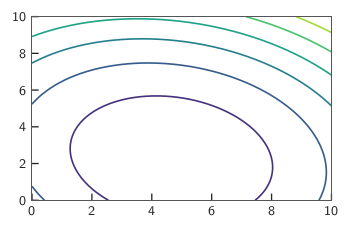

In [68]:
fig = plot_setup()

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

Z = (X-5)**2 + (Y-3)**2 + .3 * X * Y

plt.contour(X, Y, Z, cmap = 'viridis')

### Colormesh

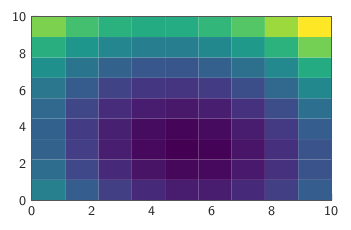

In [69]:
fig = plot_setup()

x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)
X, Y = np.meshgrid(x, y)

Z = (X-5)**2 + (Y-3)**2 + .3 * X * Y

plt.pcolormesh(X, Y, Z, cmap = 'viridis')